## Home Assignment 4

Submit your solution via Moodle until 23.59pm on Wednesday, January 22nd. Late submissions are accepted for 12 hours following the deadline, with 1/3 of the total possible points deducted from the score.

Submit your solutions in teams of up 2-3 members. **Single student submissions will not be graded anymore**.
Please denote all members of the team with their student ID and full name in the notebook. In this home assignment, you only have to submit a .ipynb notebook. Do not submit anything else than this file!

Cite ALL your sources for coding this home assignment. In case of plagiarism (copying solutions from other teams or from the internet) ALL team members will be expelled from the course without warning.

##### List team members, including all student IDs here:
1. Romayssa
2. Moncef

In [1]:
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt

### Task 1: Robustness Attacks (2 pts)


#### a) Random Attacks (0.5 pts)

Implement a function that performs a random attack of deleting $n$ nodes on a given graph. Use the signature in the cell below.

In [2]:
# INPUT VALUES
# G: networkx Graph
# n: number of deleted nodes
# 
# return G without deleted nodes

def random_attack(G,n):
    #your code here
    if n>(len(list(G.nodes()))):
        #return an empty graph
        print("All the graph nodes has been deleted")
        return  None
    else: 
        #Choose n nodes randomly
        X=random.sample(list(G.nodes()),n)
        #remove these nodes from the graph
        G.remove_nodes_from(X)
        return G

#### b) Targeted Attacks  (0.5 pts)

Implement a function that performs a targeted attack of deleting the $n$ highest-degree nodes on a given graph. Use the signature in the cell below.

In [3]:
# INPUT VALUES
# G: networkx Graph
# n: number of deleted nodes
#
# return G without deleted nodes

def target_attack(G,n):
    # your code here
    if n>(len(list(G.nodes()))):
        #return an empty graph
        return None
    D=dict(G.degree)
    l=sorted(D,key=D.get,reverse=True)
    #print("The attacked nodes are",l[:n])
    G.remove_nodes_from(l[:n])
    return G

#### c) Attacking Empirical and Random Graphs (1 pt)

Create an Erdos-Renyi and a Barabasi-Albert graph with 1000 nodes and average degree 2.

For both graphs and attack types, conduct 50 consecutive attacks of removing 10 nodes, and plot the number of removed nodes against the share of the biggest connected component in the graph. For each graph, include the curves of both attacks in the same plot. What do you observe?

In [4]:
#Erdos-Renyi  1000 nodes & average degree 2
G=nx.erdos_renyi_graph(1000,2/999)
print("Erdos-Renyi information:")
print(nx.info(G))
print("-----------------------------------------------------------")
#Barabasi-Alber 1000 nodes & average degree 2
H=nx.barabasi_albert_graph(1000,1)
print("Barabasi-Alber information:")
print(nx.info(H))

Erdos-Renyi information:
Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 956
Average degree:   1.9120
-----------------------------------------------------------
Barabasi-Alber information:
Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 999
Average degree:   1.9980


In [5]:
#Random attack erdos
G_random=G.copy()
node=[]
share_list_random=[]
for i in range(1,51):
    random_attack(G_random,10)
    share =sorted([len(x) for x in nx.connected_components(G_random)],reverse=True)[0]/1000
    share_list_random.append(share)
    if len(node)==0:
        node = [10]
    else:
        node.append(node[-1]+10)
print("Share list:", share_list_random)

Share list: [0.757, 0.749, 0.737, 0.725, 0.714, 0.699, 0.678, 0.665, 0.649, 0.638, 0.629, 0.608, 0.585, 0.571, 0.536, 0.524, 0.493, 0.486, 0.473, 0.463, 0.444, 0.419, 0.391, 0.367, 0.324, 0.313, 0.31, 0.292, 0.29, 0.281, 0.248, 0.243, 0.232, 0.217, 0.147, 0.146, 0.143, 0.119, 0.111, 0.111, 0.098, 0.086, 0.086, 0.084, 0.08, 0.04, 0.04, 0.035, 0.034, 0.03]


In [6]:
#Target attack erdos
G_target=G.copy()

share_list_target=[]
for i in range(1,51):
    random_attack(G_target,10)
    share =sorted([len(x) for x in nx.connected_components(G_target)],reverse=True)[0]/1000
    share_list_target.append(share)
print("Share list:",share_list_target)

Share list: [0.756, 0.738, 0.73, 0.722, 0.707, 0.699, 0.679, 0.668, 0.646, 0.624, 0.579, 0.562, 0.538, 0.531, 0.523, 0.517, 0.511, 0.492, 0.483, 0.472, 0.454, 0.446, 0.411, 0.395, 0.381, 0.354, 0.349, 0.346, 0.333, 0.324, 0.311, 0.296, 0.272, 0.264, 0.247, 0.189, 0.177, 0.109, 0.1, 0.099, 0.099, 0.084, 0.082, 0.047, 0.032, 0.03, 0.028, 0.028, 0.028, 0.023]


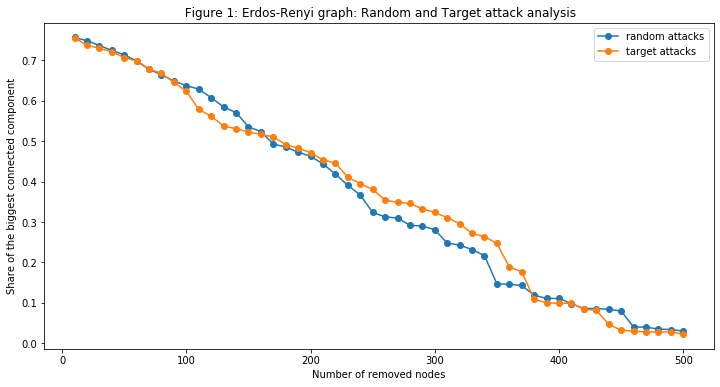

In [7]:
fig = plt.figure(figsize=(12,6))
plt.plot(node, share_list_random,'-o',label='random attacks')
plt.plot(node, share_list_target,'-o',label='target attacks')
plt.title(" Figure 1: Erdos-Renyi graph: Random and Target attack analysis")
plt.xlabel("Number of removed nodes")
plt.ylabel("Share of the biggest connected component")


plt.legend()
plt.show()

In [8]:
#Random attack Barbasi
H_random=H.copy()
node=[]
share_list_random=[]
for i in range(1,51):
    random_attack(H_random,10)
    share =sorted([len(x) for x in nx.connected_components(H_random)],reverse=True)[0]/1000
    share_list_random.append(share)
    if len(node)==0:
        node = [10]
    else:
        node.append(node[-1]+10)
print("Share list:",share_list_random)

Share list: [0.984, 0.952, 0.931, 0.911, 0.826, 0.813, 0.799, 0.784, 0.771, 0.757, 0.731, 0.723, 0.708, 0.667, 0.625, 0.616, 0.603, 0.589, 0.579, 0.462, 0.319, 0.3, 0.288, 0.284, 0.267, 0.264, 0.261, 0.248, 0.242, 0.231, 0.222, 0.218, 0.214, 0.211, 0.196, 0.194, 0.193, 0.188, 0.119, 0.115, 0.114, 0.11, 0.105, 0.103, 0.099, 0.098, 0.09, 0.089, 0.086, 0.084]


In [9]:
#Target attack erdos
H_target=H.copy()

share_list_target=[]
for i in range(1,51):
    random_attack(H_target,10)
    share =sorted([len(x) for x in nx.connected_components(H_target)],reverse=True)[0]/1000
    share_list_target.append(share)
print("Share list:",share_list_target)

Share list: [0.905, 0.866, 0.849, 0.837, 0.735, 0.711, 0.696, 0.673, 0.651, 0.634, 0.623, 0.615, 0.536, 0.522, 0.509, 0.506, 0.486, 0.475, 0.474, 0.454, 0.439, 0.426, 0.414, 0.397, 0.38, 0.373, 0.36, 0.356, 0.352, 0.347, 0.347, 0.34, 0.311, 0.207, 0.195, 0.189, 0.187, 0.173, 0.173, 0.166, 0.161, 0.158, 0.155, 0.125, 0.117, 0.116, 0.114, 0.11, 0.106, 0.103]


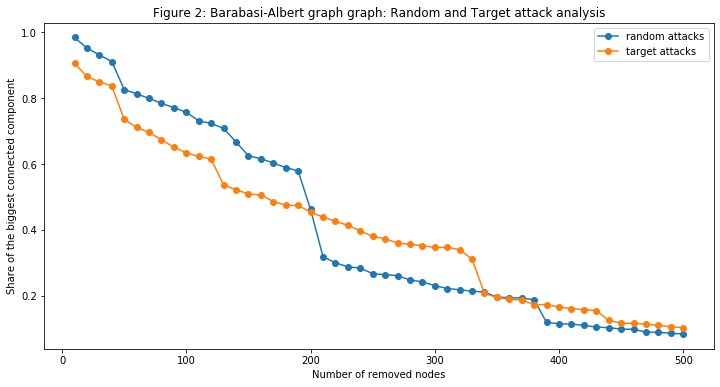

In [10]:
fig = plt.figure(figsize=(12,6))
plt.plot(node, share_list_random,'-o',label='random attacks')
plt.plot(node, share_list_target,'-o',label='target attacks')
plt.title("Figure 2: Barabasi-Albert graph graph: Random and Target attack analysis")
plt.xlabel("Number of removed nodes")
plt.ylabel("Share of the biggest connected component")


plt.legend()
plt.show()

### Explanation: What do you observe?

1) For <b> Erdos-Renyi graph </b>, figure 1 shows that <b>the graph reacts the same way to random and target attacks</b> : the share of the greatest connected componnent decrease with the same rate for both attacks.
##### Why? 
This is because Erdos-Renyi has a homogeneous structure. Due to this homogenity all the graph's nodes are approximatly the same, attacking one won't damage more the global structure than attacking another.


2) For <b>Barabási–Albert graph</b>, figure 2 shows that <b> the graph racts more to target than to random attacks </b> : the sahre of the greatest connected componnent decreases more rapidely for target attacks than for random attacks.
#### Why?
This is because Barabási–Albert is a scale-free graph, this means that the graph is constructed with a degree distribution that follow a power law. And thus, there are nodes that are more important than other; the graph is constructed with preferential attachment: Nodes with a higher degree have a stronger ability to grab links added to the network. As a consequence a target attack against highest-degree nodes will do more damages to the graph.


###  Task 2: Schelling's Model of Segregation            (3 pts)

In this task we implement a simulation of Schelling's model of segregation.  
A concise explanation on how the model is specified as well as another simulation can, for instance, be found here:

http://nifty.stanford.edu/2014/mccown-schelling-model-segregation/

#### a) Grid creation (0.25 pts)
Using the signature in the cell below, write a function that returns a numpy array of the given shape (rows, columns). Cells with a red agent should be marked with the value 1, cells with a blue agent with value 2, empty cells with a 0.

In [11]:
# INPUT VALUES:
# shape: integer tuple, shape of grid
# share_red: percent share of red nodes in the data
# share_blue: percent share of blue nodes in the data 
# -> note that blue+red shares should be <1 aas empty cell are needed

def create_grid (shape, share_red, share_blue):
       # your code here
    if (share_red+share_blue)>=1:
        print("Too much red & blue agent, try new values")
        return None
    else:
        #size of the matrix : ligne X Column
        ligne =shape[0]
        colone =shape[1]
        #1. number of blue agent = matrix size * %blue_agent
        nbr_blue=int(ligne*colone*share_blue) #natural number of agents int()
        #2. number of red agent = matrix size * %red_agent
        nbr_red=int(ligne*colone*share_red)    #natural number of agents int()
        #3. create the matrix: default value zero-- (White agents)
        matrice=np.zeros((ligne,colone))
        #populate with red agent
        ligne_red = random.sample(range(ligne),1)
        colone_red= random.sample(range(colone),1)
        for i in range(nbr_red):
            while (matrice[ligne_red,colone_red])>0:
                ligne_red = random.sample(range(ligne),1)
                colone_red= random.sample(range(colone),1)
            matrice[ligne_red,colone_red]=1
        #populate with blue agent
        ligne_blue = random.sample(range(ligne),1)
        colone_blue= random.sample(range(colone),1)
        for i in range(nbr_blue):
            while matrice[ligne_blue,colone_blue]>0:
                ligne_blue = random.sample(range(ligne),1)
                colone_blue= random.sample(range(colone),1)
            matrice[ligne_blue,colone_blue]=2
        return matrice

#### b) Visualization (0.25 pts)

Write a function that takes a numpy grid and plots it. We recommend to use matplotlib for this

In [12]:
# grid: 2D numpy array
import matplotlib
import matplotlib.pyplot as plt
def visualize(grid):
    # your code here
    colors =['white','blue','red']
    cmap = matplotlib.colors.ListedColormap(colors)
    plt.figure(figsize=(7,7))
    plt.imshow(grid, cmap=cmap)
    plt.show()

examle: grid init


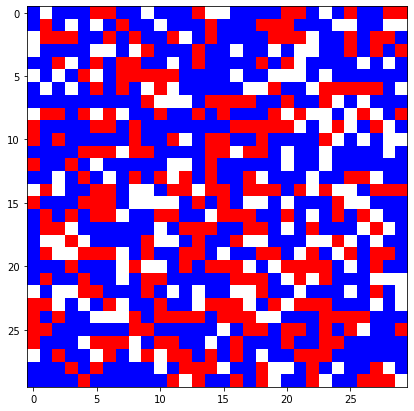

In [13]:
print("examle: grid init")
grille=create_grid((30,30),0.5,0.3)
visualize(grille)

#### c) Simulating the model (1.5 pts)

Write a function that performs a full simulation of Schelling's model given a specific initial state, by performing steps until the maximum number of steps is reached or there was no change for the given amount of steps. Every n_viz steps, as well as at the very end, a visualization of the model should be plotted.
Use a model where in case that a particular agent is unhappy, he moves a to a randomly chosen vacant place.

In [14]:
# INPUT VALUES: 
# grid: initial grid to start simulation with (2D numpy array)
# pp: preferred poportion of neighbors of own class
# n_max: maximum number of iteration steps
# no_changes_steps: number of simulation steps after which one has to stop if no change in the grid occurs
# n_viz: number of iteration steps after which current state is plotted

# RETURN:
# final_grid: 2D numpy array representing the grid at the end of your simulation

def getsatisfaction(group, target):
    with_target = -1
    neighbors = -1
    for x in group.flatten():
        if x != 0:
            neighbors += 1
            if x == target:
                with_target += 1
    if neighbors == 0:
        return 1
    return np.float(with_target/neighbors)


def getblock(grid, i, j):
    if i==0 and j==0:
        return grid[i:i+2,j:j+2]
    if i==0:
        return grid[i:i+2,j-1:j+2]
    if j==0:
        return grid[i-1:i+2, j:j+2]
    return grid[i-1:i+2,j-1:j+2]


def simulate(grid, preferred_proportion, n_max, no_changes_steps, n_viz):
    # your code here
    no_changes = 0
    grid_shape = grid.shape
    new_grid = grid.copy()
    del grid
    viz = 0
    for k in range(n_max):
        viz += 1
        old_grid = new_grid.copy()
        available_spaces = np.argwhere(old_grid == 0)
        no_changes += 1
        for i in range(grid_shape[0]):
            for j in range(grid_shape[1]):
                target = old_grid[i, j]
                if target != 0:
                    subgrid = getblock(old_grid, i, j)
                    satisfaction = getsatisfaction(subgrid, old_grid[i, j])
                    if satisfaction < preferred_proportion:
                        # he is not satisfied give him a new life!
                        if len(available_spaces):
                            newlife = available_spaces[0]
                            new_grid[newlife[0], newlife[1]] = target
                            new_grid[i, j] = 0
                            available_spaces = np.delete(available_spaces, (0), axis=0)
                    else:
                        no_changes = 0
        if viz == n_viz:
            viz = 0
            visualize(new_grid)
        if no_changes >= no_changes_steps:
            break
    final_grid = new_grid.copy()
    return final_grid

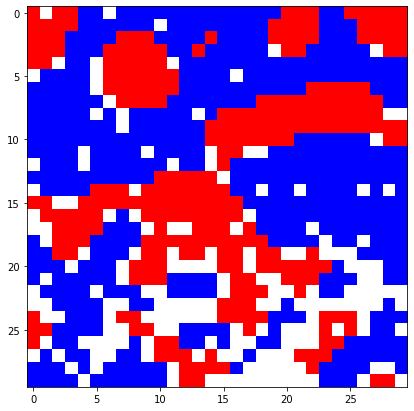

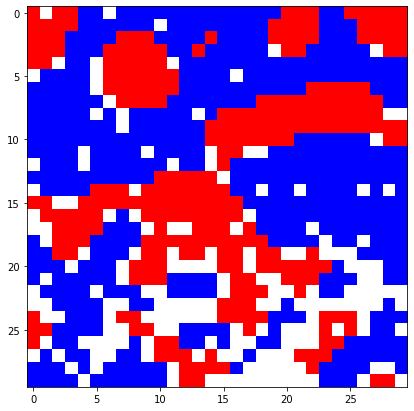

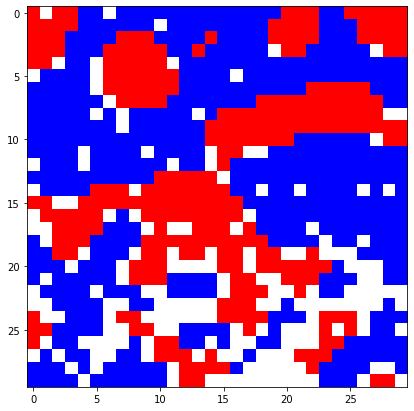

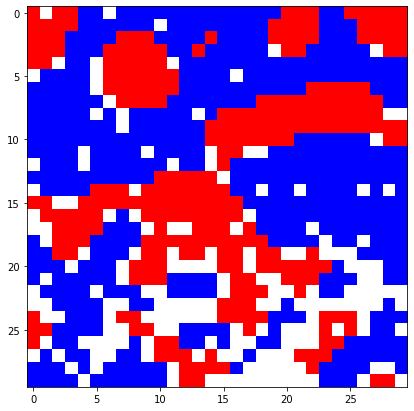

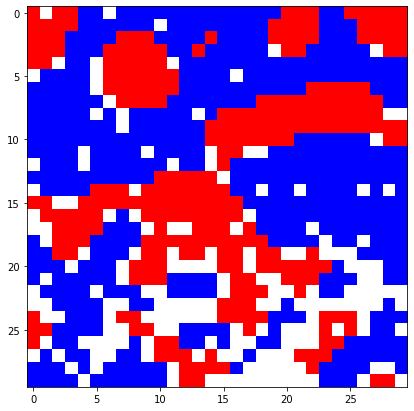

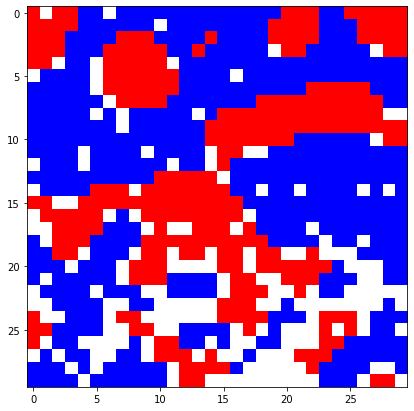

In [15]:
final = simulate(grille,0.5,200,30,30)

#### d) Model Extension (1 pt)

Adaptt your functions such that they support multiple groups (instead of just red and blue), and each group can have a separate preferred proportion. Use the signatures from the cells below, where changes from the signatures in 2c) are explained.

In [16]:
# shares: list of shares for each color, entries in return matrix from 0 (empty cell) to number of colors.
def create_grid_ext (shape, shares):
    # your code here
    if (sum(shares))>=1:
        print("Proportion is greater than or equal 1")
        return None
    else:
        #size of the matrix : ligne X Column
        ligne =shape[0]
        colone =shape[1]
        #1. a list containing the number of agent of each color
        nbr_color=[]
        for i in shares:
            nbr_color.append(int(ligne*colone*i))
        # 2. create the matrix: default value zero-- (White agents)
        matrice=np.zeros((ligne,colone))
        #3. populate the matrice
        color=1
        for i in nbr_color:
            ligne_color = random.sample(range(ligne),1)
            colone_color= random.sample(range(colone),1)
            for j in range(i):
                while (matrice[ligne_color,colone_color])>0:
                    ligne_color = random.sample(range(ligne),1)
                    colone_color= random.sample(range(colone),1)
                matrice[ligne_color,colone_color]=color
            color=color+1
        return matrice

In [17]:
# adapt color selection
import matplotlib
import matplotlib.pyplot as plt
import itertools

def visualize_ext(grid):
# your code here
    colors = list(matplotlib.colors.BASE_COLORS)
    colors.reverse()
    plt.figure(figsize=(7,7))
    plt.imshow(grid, cmap=matplotlib.colors.ListedColormap(colors))
    plt.show()

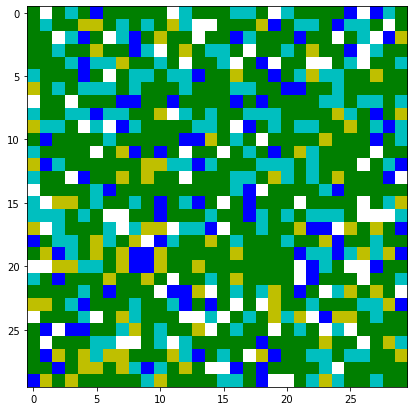

In [18]:
l=[0.1,0.2,0.5,0.1]
grille=create_grid_ext((30,30),l)
visualize_ext(grille)

In [19]:
# preferred_proportions: give a list of preferred proportions for each color
def simulate(grid, preferred_proportions, max_steps, no_changes_steps, iterations_to_next_vizualization):
    # your code here
    no_changes = 0
    grid_shape = grid.shape
    new_grid = grid.copy()
    del grid
    viz = 0
    for k in range(max_steps):
        viz += 1
        old_grid = new_grid.copy()
        available_spaces = np.argwhere(old_grid == 0)
        no_changes += 1
        for i in range(grid_shape[0]):
            for j in range(grid_shape[1]):
                target = old_grid[i, j]
                if target != 0:
                    subgrid = getblock(old_grid, i, j)
                    satisfaction = getsatisfaction(subgrid, old_grid[i, j])
                    if satisfaction < preferred_proportions[int(target-1)]:
                        no_changes = 0
                        # he is not satisfied give him a new life!
                        if len(available_spaces):
                            newlife = available_spaces[0]
                            new_grid[newlife[0], newlife[1]] = target
                            new_grid[i, j] = 0
                            available_spaces = np.delete(available_spaces, (0), axis=0)
                    else:
                        no_changes = 0
        if viz == iterations_to_next_vizualization:
            viz = 0
            visualize_ext(new_grid)
        if no_changes >= no_changes_steps:
            break
    final_grid = new_grid.copy()
    return final_grid

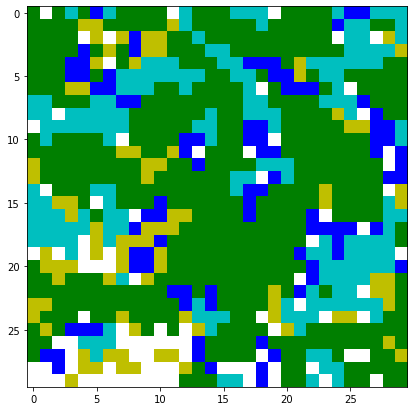

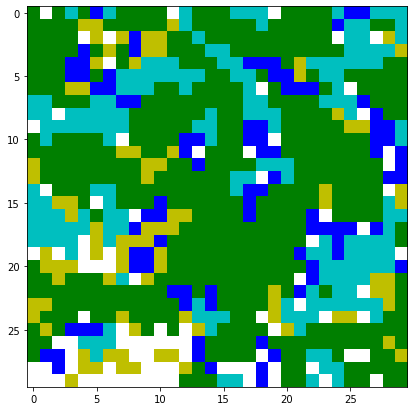

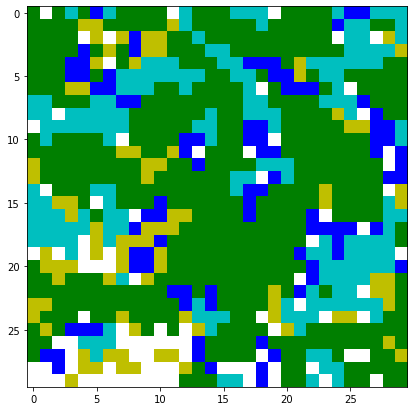

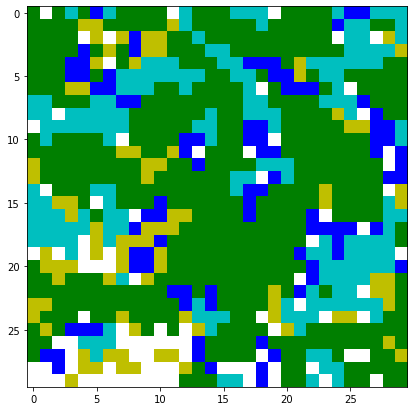

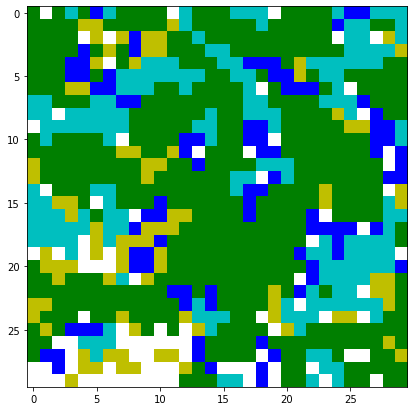

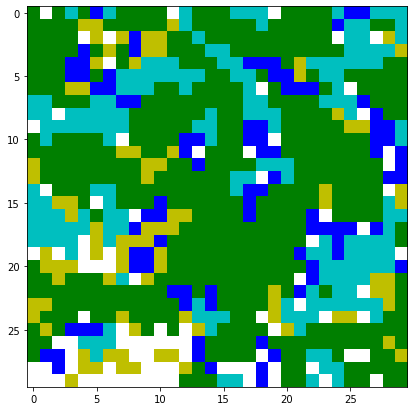

In [20]:
final = simulate(grille, l, 200, 30, 30)